In [1]:
    %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Uber data 

In [2]:
os.chdir('C:/Users/Charlotte/Desktop/python_course/Download')


Uber=pd.read_csv('uber_janjun15.csv',parse_dates=True, infer_datetime_format=True)


In [3]:
dir_str='C:/Users/Charlotte/Desktop/python_course/Download'

In [4]:
print(Uber.shape)
print(Uber.columns)
Uber.head(5)

(14270479, 4)
Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
Uber_datetime=pd.to_datetime(Uber['Pickup_date'], infer_datetime_format=True)
Uber_time=Uber_datetime.dt.time
Uber_date=Uber_datetime.dt.date

In [6]:
Pickup_Time=pd.DataFrame(Uber_time)
Pickup_Date=pd.DataFrame(Uber_date)

In [7]:
Pickup_Time.columns=['Pickup_time']
Pickup_Time.head(5)

,Pickup_time
0,09:47:00
1,09:47:00
2,09:47:00
3,09:47:00
4,09:47:00


In [8]:
Pickup_Date.columns=['Pickup_date']
Pickup_Date.head(5)

,Pickup_date
0,2015-05-17
1,2015-05-17
2,2015-05-17
3,2015-05-17
4,2015-05-17


In [9]:
Pickups=Pickup_Date.join(Pickup_Time)
Uber['Pickup_date']=Pickup_Date
Uber['Pickup_time']=Pickup_Time
Uber.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Pickup_time
0,B02617,2015-05-17,B02617,141,09:47:00
1,B02617,2015-05-17,B02617,65,09:47:00
2,B02617,2015-05-17,B02617,100,09:47:00
3,B02617,2015-05-17,B02774,80,09:47:00
4,B02617,2015-05-17,B02617,90,09:47:00


In [10]:
Uber=pd.DataFrame(Uber[['Pickup_date','Pickup_time','Affiliated_base_num','locationID']])
Uber.head(5)

,Pickup_date,Pickup_time,Affiliated_base_num,locationID
0,2015-05-17,09:47:00,B02617,141
1,2015-05-17,09:47:00,B02617,65
2,2015-05-17,09:47:00,B02617,100
3,2015-05-17,09:47:00,B02774,80
4,2015-05-17,09:47:00,B02617,90


In [11]:
rides_date=pd.DataFrame((Uber['Pickup_date'].value_counts()))

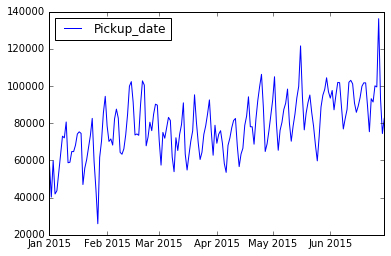

In [12]:
rides_date.plot()

In [13]:
Loc_ID=pd.read_csv('taxi-zones.csv')

In [14]:
Loc_ID.set_index('LocationID',inplace=True)
Loc_ID.head(5)

,Borough,Zone
LocationID,,
1,EWR,Newark Airport
2,Queens,Jamaica Bay
3,Bronx,Allerton/Pelham Gardens
4,Manhattan,Alphabet City
5,Staten Island,Arden Heights


In [15]:
Location_name=Loc_ID['Zone']+', '+Loc_ID['Borough']

In [16]:
print(Location_name[0:7])

LocationID
1                       Newark Airport, EWR
2                       Jamaica Bay, Queens
3            Allerton/Pelham Gardens, Bronx
4                  Alphabet City, Manhattan
5              Arden Heights, Staten Island
6    Arrochar/Fort Wadsworth, Staten Island
7                           Astoria, Queens
dtype: object


In [17]:
Loc_ID['Location_name']=Location_name

In [18]:
Loc_ID.head(5)

,Borough,Zone,Location_name
LocationID,,,
1,EWR,Newark Airport,"Newark Airport, EWR"
2,Queens,Jamaica Bay,"Jamaica Bay, Queens"
3,Bronx,Allerton/Pelham Gardens,"Allerton/Pelham Gardens, Bronx"
4,Manhattan,Alphabet City,"Alphabet City, Manhattan"
5,Staten Island,Arden Heights,"Arden Heights, Staten Island"


### steal gelocator code from Chris

import geocoder

import geopy

from geopy.geocoders import Nominatim
geolocator = Nominatim()

Loc_ID['Station_Coord'] = Loc_ID['Location_name'].map(lambda x: geolocator.geocode(x))

In [21]:
Loc_ID.head(5)

,Borough,Zone,Location_name
LocationID,,,
1,EWR,Newark Airport,"Newark Airport, EWR"
2,Queens,Jamaica Bay,"Jamaica Bay, Queens"
3,Bronx,Allerton/Pelham Gardens,"Allerton/Pelham Gardens, Bronx"
4,Manhattan,Alphabet City,"Alphabet City, Manhattan"
5,Staten Island,Arden Heights,"Arden Heights, Staten Island"


# Citi bike data import and manipulation

In [22]:
#citibike = pd.read_csv('citibike2014Q4.csv')

citibike2015Q1 = pd.read_csv('Citibike2015-Q1.csv')
citibike2015Q2 = pd.read_csv('Citibike2015-Q2.csv')
citibike = pd.concat([citibike2015Q1, citibike2015Q2])

In [23]:
citibike.head(5)

,24-Hour Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm),Cumulative trips (since launch),Cumulative trips (since launch):,Date,Miles traveled to date,Miles traveled to date:,Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Memberships Sold,Trips over the past 24-hours (midnight to 11:59pm)
0,267,11,NaN,15216843.0,1/1/2015,NaN,26055797.0,9191,127279.0,NaN,5792
1,298,8,NaN,15229214.0,1/2/2015,NaN,26074019.0,18222,127293.0,NaN,12371
2,96,7,NaN,15234048.0,1/3/2015,NaN,26080301.0,6282,127300.0,NaN,4834
3,152,5,NaN,15242557.0,1/4/2015,NaN,26092001.0,11700,127308.0,NaN,8509
4,88,12,NaN,15258349.0,1/5/2015,NaN,26112023.0,20022,127336.0,NaN,15792


In [24]:
Jan = pd.read_csv('201501-citibike-tripdata.csv')
Feb = pd.read_csv('201502-citibike-tripdata.csv')
Mar = pd.read_csv('201503-citibike-tripdata.csv')
Apr = pd.read_csv('201504-citibike-tripdata.csv')
May = pd.read_csv('201505-citibike-tripdata.csv')

In [25]:
citibike_trip = pd.concat([Jan,Feb,Mar,Apr,May])

In [26]:
citibike_trip.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [100]:
def parseDate(dateStr):
    dateStr=str(dateStr)
    return(dateStr.split(' '))

In [101]:
parseDate('1/1/2015 0:04')

['1/1/2015', '0:04']

In [99]:
#clean up the Date column- new df
total_bikes=pd.DataFrame(citibike_trip['starttime'])
total_bikes['starttime'] = pd.to_datetime(total_bikes['starttime'],format='%m/%d/%Y %M:%S')
#total_bikes['starttime'] = total_bikes['starttime'].map(lambda t: t.split(' '))
#total_bikes.head(5)


ValueError: unconverted data remains: :23

# Weather data import and manipulation 

In [27]:
os.chdir(dir_str)
weatherData2015 = pd.read_csv('2015WeatherData.csv')
#Only looking at central park data
weatherData2015 = weatherData2015[(weatherData2015['STATION_NAME'] == 'NY CITY CENTRAL PARK NY US')]

weatherData2015['TAVG'] = weatherData2015['TAVG'].map(lambda x: x if x > -100 else None)
del weatherData2015['STATION']

weatherData2015.head(2)

,STATION_NAME,DATE,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,...,PGTM,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
18703,NY CITY CENTRAL PARK NY US,20150101,-9999.0,-9999,0.0,0.0,0.0,None,39,27,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
18704,NY CITY CENTRAL PARK NY US,20150102,-9999.0,-9999,0.0,0.0,0.0,None,42,35,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [28]:
#clean up the Date column
weatherData2015['DATE'] = pd.to_datetime(weatherData2015['DATE'],format='%Y%m%d')
weatherData2015['DATE'] = pd.to_datetime(weatherData2015['DATE'], format='%m-%d-%Y')
weatherData2015['DATE'] = weatherData2015['DATE'].map(lambda t: t.strftime('%m-%d-%Y'))


In [29]:
weatherData2015.head(5)

,STATION_NAME,DATE,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,...,PGTM,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
18703,NY CITY CENTRAL PARK NY US,01-01-2015,-9999.0,-9999,0.00,0.0,0.0,None,39,27,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
18704,NY CITY CENTRAL PARK NY US,01-02-2015,-9999.0,-9999,0.00,0.0,0.0,None,42,35,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
18705,NY CITY CENTRAL PARK NY US,01-03-2015,-9999.0,-9999,0.71,0.0,0.0,None,42,33,...,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,1,-9999
18706,NY CITY CENTRAL PARK NY US,01-04-2015,-9999.0,-9999,0.30,0.0,0.0,None,56,41,...,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,-9999,-9999
18707,NY CITY CENTRAL PARK NY US,01-05-2015,-9999.0,-9999,0.00,0.0,0.0,None,49,21,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [69]:
import math 
import numpy as np
T_sample=list(range(0,110))
print(T_sample[0:5])
T_factor=pd.DataFrame(T_sample)
T_factor['T_Factor']=T_factor[0].map(lambda x: -100*np.exp(-(.002*((x-65)**2))))

[0, 1, 2, 3, 4]


In [79]:
Temp_2015=weatherData2015['TMAX']
T_factor=pd.DataFrame(Temp_2015)
T_factor.columns=['Temp']
T_factor['T_Factor']=T_factor['Temp'].map(lambda x: 100-100*np.exp(-(.002*((x-65)**2))))
T_factor.head(5)

,Temp,T_Factor
18703,39,74.127770
18704,42,65.285058
18705,42,65.285058
18706,56,14.955880
18707,49,40.070421


In [80]:
T_factor['Date']=weatherData2015['DATE']

In [81]:
T_factor.head(5)

,Temp,T_Factor,Date
18703,39,74.127770,01-01-2015
18704,42,65.285058,01-02-2015
18705,42,65.285058,01-03-2015
18706,56,14.955880,01-04-2015
18707,49,40.070421,01-05-2015


In [84]:
T_factor.set_index('Date')
T_factor.head(5)

,Temp,T_Factor,Date
18703,39,74.127770,01-01-2015
18704,42,65.285058,01-02-2015
18705,42,65.285058,01-03-2015
18706,56,14.955880,01-04-2015
18707,49,40.070421,01-05-2015


(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text xticklabel objects>)

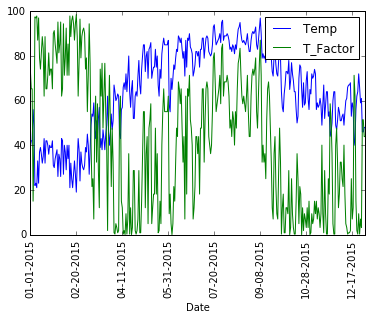

In [90]:
Wplt=T_factor.plot(kind='line',x='Date')
plt.xticks(rotation=90)